In [1]:
#Import packages to be used
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
import pickle
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV

In [2]:
# Imports raw data
housing_import = pd.read_csv('trimmed_data.csv', index_col='Id')

In [3]:
# Cleaning out NaN values remaining
housing_import = housing_import[housing_import.MasVnrType.isnull() == False]
housing = housing_import.drop('MiscFeature', axis=1)

In [4]:
pd.get_dummies(housing)

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,1stFlrSF,LowQualFinSF,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
Id,,,,,,,,,,,,,,,,,,,,,
1,60,65.0,8450,7,5,2003,2003,196.0,856,0,...,0,0,0,1,0,0,0,0,1,0
2,20,80.0,9600,6,8,1976,1976,0.0,1262,0,...,0,0,0,1,0,0,0,0,1,0
3,60,68.0,11250,7,5,2001,2002,162.0,920,0,...,0,0,0,1,0,0,0,0,1,0
4,70,60.0,9550,7,5,1915,1970,0.0,961,0,...,0,0,0,1,1,0,0,0,0,0
5,60,84.0,14260,8,5,2000,2000,350.0,1145,0,...,0,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1456,60,62.0,7917,6,5,1999,2000,0.0,953,0,...,0,0,0,1,0,0,0,0,1,0
1457,20,85.0,13175,6,6,1978,1988,119.0,2073,0,...,0,0,0,1,0,0,0,0,1,0
1458,70,66.0,9042,7,9,1941,2006,0.0,1188,0,...,0,0,0,1,0,0,0,0,1,0


My interpretation of the get dummies function is that it took each categorical variable and added a variable to the dataframe for each category and populated that variable with a binary to capture datapoints from that category. 

In [5]:
housing_dummies = pd.get_dummies(housing)

In [6]:
# Creating Target and Feature Arrays
# .values returns numpy array instead of dataframe
X = housing_dummies.drop('SalePrice', axis=1).values
y = housing_dummies.SalePrice.values



In [7]:
# Unsure as what I need as far as reshaping goes
X.shape
y.shape

y = y.reshape(-1, 1)

In [8]:
# Train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state=42)

In [9]:
X_train.shape

(1089, 273)

In [10]:
# Creating a dataframe for performance metrics
d = {'R_Squared': [], 'RMSE': [], 'MAPE': []}
metrics = pd.DataFrame(data=d)
metrics.index.name = 'Model'
metrics

,R_Squared,RMSE,MAPE
Model,,,


In [11]:
# Create LinearRegression Object
reg = LinearRegression()

In [12]:
# Fit the data
reg.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [13]:
# Create Predictions based on fit
y_pred_test = reg.predict(X_test)
y_pred_train = reg.predict(X_train)

In [14]:
# Performance Metrics for training set
print("R^2: {}".format(reg.score(X_train, y_train)))
rmse = np.sqrt(mean_squared_error(y_train, y_pred_train))
print("Root Mean Squared Error: {}".format(rmse))
error = (y_train-y_pred_train)/y_train * 100
mape = abs(error).mean()
print('Mean Absolute Percent Error: {}'.format(mape))

R^2: 0.930668487832045
Root Mean Squared Error: 20867.61910938707
Mean Absolute Percent Error: 8.179160424146515


In [15]:
# Adding metrics to the metrics dataframe
d = {'R_Squared': [reg.score(X_train, y_train)], 'RMSE': [rmse], 'MAPE': [mape]}
temp = pd.DataFrame(data=d, index=['Linear_Train'])
temp.index.name = 'Model'
metrics = metrics.append(temp)

In [16]:
# Performance Metrics for test set
print("R^2: {}".format(reg.score(X_test, y_test)))
rmse = np.sqrt(mean_squared_error(y_test, y_pred_test))
print("Root Mean Squared Error: {}".format(rmse))
error = (y_test-y_pred_test)/y_test * 100
mape = abs(error).mean()
print('Mean Absolute Percent Error: {}'.format(mape))

R^2: 0.8770252691748901
Root Mean Squared Error: 27774.277800625732
Mean Absolute Percent Error: 11.10724000427329


In [17]:
# Adding metrics to the metrics dataframe
d = {'R_Squared': [reg.score(X_test, y_test)], 'RMSE': [rmse], 'MAPE': [mape]}
temp = pd.DataFrame(data=d, index=['Linear_Test'])
temp.index.name = 'Model'
metrics = metrics.append(temp)

In [18]:
metrics

,R_Squared,RMSE,MAPE
Model,,,
Linear_Train,0.930668,20867.619109,8.17916
Linear_Test,0.877025,27774.277801,11.10724


In [19]:
# Applying Ridge Regression

# Train test split -- Random state 42 should produce same split as above
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state=42)

# Creating Ridge object, fitting, and predicting. Normalize = true ensures all variables are on the same scale
ridge = Ridge(alpha=0.1, normalize = True)
ridge.fit(X_train, y_train)
ridge_pred_test = ridge.predict(X_test)
ridge_pred_train = ridge.predict(X_train)


In [20]:
# Metrics for train set
print("R^2: {}".format(ridge.score(X_train, y_train)))
rmse = np.sqrt(mean_squared_error(y_train, ridge_pred_train))
print("Root Mean Squared Error: {}".format(rmse))
error = (y_train-ridge_pred_train)/y_train * 100
mape = abs(error).mean()
print('Mean Absolute Percent Error: {}'.format(mape))

R^2: 0.9247829736114249
Root Mean Squared Error: 21735.300298706716
Mean Absolute Percent Error: 8.211178219406166


In [21]:
# Adding metrics to the metrics dataframe
d = {'R_Squared': [ridge.score(X_train, y_train)], 'RMSE': [rmse], 'MAPE': [mape]}
temp = pd.DataFrame(data=d, index=['Ridge_Train'])
temp.index.name = 'Model'
metrics = metrics.append(temp)

In [22]:
# Performance Metrics for test set
print("R^2: {}".format(ridge.score(X_test, y_test)))
rmse = np.sqrt(mean_squared_error(y_test, ridge_pred_test))
print("Root Mean Squared Error: {}".format(rmse))
error = (y_test-ridge_pred_test)/y_test * 100
mape = abs(error).mean()
print('Mean Absolute Percent Error: {}'.format(mape))

R^2: 0.8946196664700052
Root Mean Squared Error: 25710.742518631756
Mean Absolute Percent Error: 9.869781484030518


In [23]:
# Adding metrics to the metrics dataframe
d = {'R_Squared': [ridge.score(X_test, y_test)], 'RMSE': [rmse], 'MAPE': [mape]}
temp = pd.DataFrame(data=d, index=['Ridge_Test'])
temp.index.name = 'Model'
metrics = metrics.append(temp)

In [24]:
metrics

,R_Squared,RMSE,MAPE
Model,,,
Linear_Train,0.930668,20867.619109,8.179160
Linear_Test,0.877025,27774.277801,11.107240
Ridge_Train,0.924783,21735.300299,8.211178
Ridge_Test,0.894620,25710.742519,9.869781


In [25]:
# Applying Lasso Regression

# Train test split -- Random state 42 should produce same split as above
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state=42)

lasso = Lasso(alpha = 0.1, normalize = True)
lasso.fit(X_train, y_train)
lasso_pred_test = lasso.predict(X_test)
lasso_pred_train = lasso.predict(X_train)

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 27038030845.835327, tolerance: 683979380.2201886
  positive)


In [26]:
# Performance metrics for train set
print("R^2: {}".format(lasso.score(X_train, y_train)))
rmse = np.sqrt(mean_squared_error(y_train, lasso_pred_train))
print("Root Mean Squared Error: {}".format(rmse))
error = (y_train-lasso_pred_train)/y_train * 100
mape = abs(error).mean()
print('Mean Absolute Percent Error: {}'.format(mape))

R^2: 0.9306625361304
Root Mean Squared Error: 20868.514771213853
Mean Absolute Percent Error: 49.564077550621406


In [27]:
# Adding metrics to the metrics dataframe
d = {'R_Squared': [lasso.score(X_train, y_train)], 'RMSE': [rmse], 'MAPE': [mape]}
temp = pd.DataFrame(data=d, index=['Lasso_Train'])
temp.index.name = 'Model'
metrics = metrics.append(temp)

In [28]:
# Performance Metrics for test set
print("R^2: {}".format(lasso.score(X_test, y_test)))
rmse = np.sqrt(mean_squared_error(y_test, lasso_pred_test))
print("Root Mean Squared Error: {}".format(rmse))
error = (y_test-lasso_pred_test)/y_test * 100
mape = abs(error).mean()
print('Mean Absolute Percent Error: {}'.format(mape))

R^2: 0.8870814680713186
Root Mean Squared Error: 26614.44697352724
Mean Absolute Percent Error: 50.80983987084027


In [29]:
# Adding metrics to the metrics dataframe
d = {'R_Squared': [lasso.score(X_test, y_test)], 'RMSE': [rmse], 'MAPE': [mape]}
temp = pd.DataFrame(data=d, index=['Lasso_Test'])
temp.index.name = 'Model'
metrics = metrics.append(temp)

In [30]:
metrics

,R_Squared,RMSE,MAPE
Model,,,
Linear_Train,0.930668,20867.619109,8.179160
Linear_Test,0.877025,27774.277801,11.107240
Ridge_Train,0.924783,21735.300299,8.211178
Ridge_Test,0.894620,25710.742519,9.869781
Lasso_Train,0.930663,20868.514771,49.564078
Lasso_Test,0.887081,26614.446974,50.809840


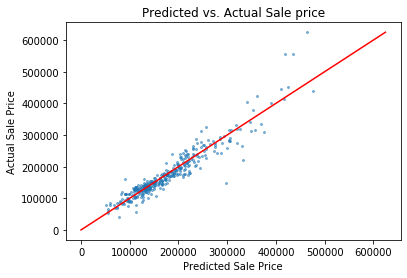

In [31]:
# Predicted vs actual scatterplot
plt.scatter(ridge_pred_test, y_test, alpha=0.5, s=4)
plt.title('Predicted vs. Actual Sale price')
plt.xlabel('Predicted Sale Price')
plt.ylabel('Actual Sale Price')
plt.plot(list(range(y_test.max())),list(range(y_test.max())), c='r')
plt.show()

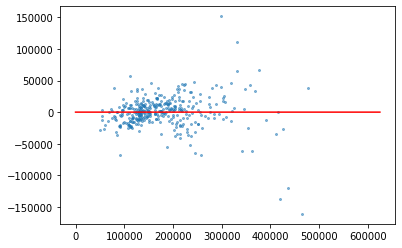

In [32]:
# Predicted vs residuals
residuals = ridge_pred_test-y_test
plt.scatter(ridge_pred_test, residuals, alpha = 0.5, s=4)
plt.plot(list(range(y_test.max())),[0]*y_test.max(), c='r')
plt.show()

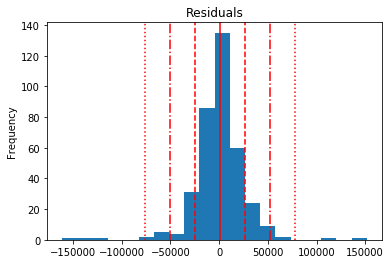

In [33]:
# Histogram of Residuals
mean = np.mean(residuals)
std_dev = np.std(residuals)

plt.hist(residuals, bins=20)
plt.axvline(mean, color='r')
plt.axvline(mean + std_dev, color='r', linestyle='--')
plt.axvline(mean + 2* std_dev, color='r', linestyle='-.')
plt.axvline(mean + 3* std_dev, color='r', linestyle=':')
plt.axvline(mean - std_dev, color='r', linestyle='--')
plt.axvline(mean - 2* std_dev, color='r', linestyle='-.')
plt.axvline(mean - 3* std_dev, color='r', linestyle=':')
plt.title('Residuals')
plt.ylabel('Frequency')
plt.show()

In [34]:
residuals[residuals > mean + 3* std_dev]

array([151644.17378585, 110559.76313608])

In [35]:
residuals[residuals < mean - 3* std_dev]

array([-137388.50110646, -119395.39255961, -160973.12981782])

In [36]:
# Setup the hyperparameter grid
alpha_space = list(np.arange(11)/10)
param_grid = {'alpha': alpha_space}

# Instantiate a ridge regression classifier: ridge
ridge = Ridge()

# Instantiate the GridSearchCV object: logreg_cv
ridge_cv = GridSearchCV(ridge, param_grid, cv=5)

# Fit it to the data
ridge_cv.fit(X, y)

# Print the tuned parameters and score
print("Tuned Logistic Regression Parameters: {}".format(ridge_cv.best_params_)) 
print("Best score is {}".format(ridge_cv.best_score_))

Tuned Logistic Regression Parameters: {'alpha': 1.0}
Best score is 0.8380831698524468


/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [37]:
ridge_cv.cv_results_

{'mean_fit_time': array([0.05249524, 0.00739422, 0.00777206, 0.00749674, 0.00732322,
        0.00785666, 0.00749507, 0.0072484 , 0.00736122, 0.00802603,
        0.00757556]),
 'std_fit_time': array([3.27357216e-02, 5.59773326e-04, 4.88666819e-04, 3.32632852e-04,
        7.77385558e-05, 1.09524986e-03, 1.17936550e-04, 4.70476645e-05,
        1.99013082e-04, 7.58256377e-04, 1.37307361e-04]),
 'mean_score_time': array([0.00066094, 0.00068436, 0.00069518, 0.00066009, 0.00066061,
        0.00064282, 0.00065622, 0.00063391, 0.00063658, 0.00068412,
        0.00065618]),
 'std_score_time': array([8.34906870e-05, 1.55358391e-04, 6.63961113e-05, 3.06727517e-05,
        5.82564272e-05, 1.48666172e-05, 1.83867567e-05, 1.10245328e-05,
        2.65919561e-06, 7.44051788e-05, 6.20328307e-06]),
 'param_alpha': masked_array(data=[0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0],
              mask=[False, False, False, False, False, False, False, False,
                    False, False, False],
 

In [38]:
# Applying Ridge Regression with different alpha based on grid search CV results

# Train test split -- Random state 42 should produce same split as above
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state=42)

# Creating Ridge object, fitting, and predicting. Normalize = true ensures all variables are on the same scale
ridge = Ridge(alpha=1, normalize = True)
ridge.fit(X_train, y_train)
ridge_pred_test = ridge.predict(X_test)
ridge_pred_train = ridge.predict(X_train)


In [39]:
# Metrics for train set
print("R^2: {}".format(ridge.score(X_train, y_train)))
rmse = np.sqrt(mean_squared_error(y_train, ridge_pred_train))
print("Root Mean Squared Error: {}".format(rmse))
error = (y_train-ridge_pred_train)/y_train * 100
mape = abs(error).mean()
print('Mean Absolute Percent Error: {}'.format(mape))

R^2: 0.8803963770194232
Root Mean Squared Error: 27408.150631030552
Mean Absolute Percent Error: 9.480727315879573


In [40]:
# Adding metrics to the metrics dataframe
d = {'R_Squared': [ridge.score(X_train, y_train)], 'RMSE': [rmse], 'MAPE': [mape]}
temp = pd.DataFrame(data=d, index=['Ridge_Train_a=1'])
temp.index.name = 'Model'
metrics = metrics.append(temp)

In [41]:
# Performance Metrics for test set
print("R^2: {}".format(ridge.score(X_test, y_test)))
rmse = np.sqrt(mean_squared_error(y_test, ridge_pred_test))
print("Root Mean Squared Error: {}".format(rmse))
error = (y_test-ridge_pred_test)/y_test * 100
mape = abs(error).mean()
print('Mean Absolute Percent Error: {}'.format(mape))

R^2: 0.8729249000973185
Root Mean Squared Error: 28233.5224482231
Mean Absolute Percent Error: 9.947499373223314


In [42]:
# Adding metrics to the metrics dataframe
d = {'R_Squared': [ridge.score(X_test, y_test)], 'RMSE': [rmse], 'MAPE': [mape]}
temp = pd.DataFrame(data=d, index=['Ridge_Test_a=1'])
temp.index.name = 'Model'
metrics = metrics.append(temp)

In [43]:
metrics

,R_Squared,RMSE,MAPE
Model,,,
Linear_Train,0.930668,20867.619109,8.179160
Linear_Test,0.877025,27774.277801,11.107240
Ridge_Train,0.924783,21735.300299,8.211178
Ridge_Test,0.894620,25710.742519,9.869781
Lasso_Train,0.930663,20868.514771,49.564078
Lasso_Test,0.887081,26614.446974,50.809840
Ridge_Train_a=1,0.880396,27408.150631,9.480727
Ridge_Test_a=1,0.872925,28233.522448,9.947499


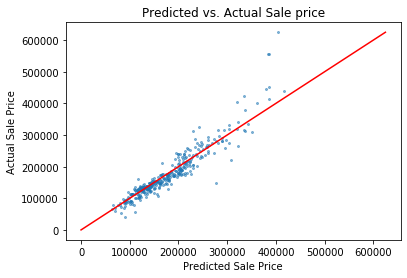

In [44]:
# Rerunning graphics with different ridge model

# Predicted vs actual scatterplot
plt.scatter(ridge_pred_test, y_test, alpha=0.5, s=4)
plt.title('Predicted vs. Actual Sale price')
plt.xlabel('Predicted Sale Price')
plt.ylabel('Actual Sale Price')
plt.plot(list(range(y_test.max())),list(range(y_test.max())), c='r')
plt.show()

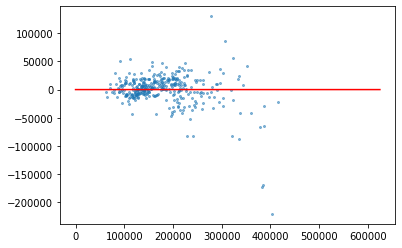

In [45]:
# Predicted vs residuals
residuals = ridge_pred_test-y_test
residuals_train = ridge_pred_train-y_train
plt.scatter(ridge_pred_test, residuals, alpha = 0.5, s=4)
plt.plot(list(range(y_test.max())),[0]*y_test.max(), c='r')
plt.show()

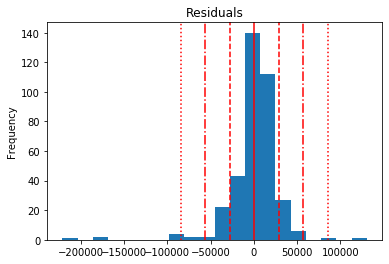

In [46]:
# Histogram of Residuals
mean = np.mean(residuals)
std_dev = np.std(residuals)

mean_train = np.mean(residuals_train)
std_dev_train = np.std(residuals_train)

plt.hist(residuals, bins=20)
plt.axvline(mean, color='r')
plt.axvline(mean + std_dev, color='r', linestyle='--')
plt.axvline(mean + 2* std_dev, color='r', linestyle='-.')
plt.axvline(mean + 3* std_dev, color='r', linestyle=':')
plt.axvline(mean - std_dev, color='r', linestyle='--')
plt.axvline(mean - 2* std_dev, color='r', linestyle='-.')
plt.axvline(mean - 3* std_dev, color='r', linestyle=':')
plt.title('Residuals')
plt.ylabel('Frequency')
plt.show()

In [47]:
residuals[residuals > mean + 3* std_dev]

array([130341.62409469,  85685.5089314 ])

In [48]:
residuals[residuals < mean - 3* std_dev]

array([-172773.21224808, -169388.21426657,  -88220.09686655,
       -220959.84975065])

In [49]:
# A set of all indicies of high outlier points
high_residuals = np.where(abs(residuals) > mean + 3* std_dev)
high_residuals_train = np.where(abs(residuals_train) > mean_train + 3*std_dev_train)

In [50]:
# Question for removing outliers. Should I be finding and removing outliers from the train set or the test set? Both? 


# Dropping Outliers
X_test_no_outliers = np.delete(X_test, high_residuals[0], axis=0)
y_test_no_outliers = np.delete(y_test, high_residuals[0], axis=0)
X_train_no_outliers = np.delete(X_train, high_residuals_train[0], axis=0)
y_train_no_outliers = np.delete(y_train, high_residuals_train[0], axis=0)

In [51]:
X_test_no_outliers.shape

(357, 273)

In [52]:
y_test_no_outliers.shape

(357, 1)

In [53]:
high_residuals[0]

array([  3,  32,  65, 118, 244, 330])

In [54]:
high_residuals_train[0]

array([ 42,  77, 131, 173, 216, 221, 235, 525, 558, 614, 621, 669, 772,
       825, 864, 886, 913, 959])

In [55]:
X_test.shape

(363, 273)

In [56]:
X_train.shape

(1089, 273)

In [57]:
X_train_no_outliers.shape

(1071, 273)

In [58]:
X_train_no_outliers.shape

(1071, 273)

In [59]:
y_train_no_outliers.shape

(1071, 1)

In [60]:
# Applying Ridge Regression with outliers removed

# Creating Ridge object, fitting, and predicting. Normalize = true ensures all variables are on the same scale
ridge = Ridge(alpha=1, normalize = True)
ridge.fit(X_train_no_outliers, y_train_no_outliers)
ridge_pred_no_test = ridge.predict(X_test_no_outliers)
ridge_pred_no_train = ridge.predict(X_train_no_outliers)


In [61]:
# Metrics for train set
print("R^2: {}".format(ridge.score(X_train_no_outliers, y_train_no_outliers)))
rmse = np.sqrt(mean_squared_error(y_train_no_outliers, ridge_pred_no_train))
print("Root Mean Squared Error: {}".format(rmse))
error = (y_train_no_outliers-ridge_pred_no_train)/y_train_no_outliers * 100
mape = abs(error).mean()
print('Mean Absolute Percent Error: {}'.format(mape))

R^2: 0.9116515473843811
Root Mean Squared Error: 20699.63700012817
Mean Absolute Percent Error: 8.808674624341462


In [62]:
# Adding metrics to the metrics dataframe
d = {'R_Squared': [ridge.score(X_train_no_outliers, y_train_no_outliers)], 'RMSE': [rmse], 'MAPE': [mape]}
temp = pd.DataFrame(data=d, index=['Ridge_Train_No_Outliers'])
temp.index.name = 'Model'
metrics = metrics.append(temp)

In [63]:
# Performance Metrics for test set
print("R^2: {}".format(ridge.score(X_test_no_outliers, y_test_no_outliers)))
rmse = np.sqrt(mean_squared_error(y_test_no_outliers, ridge_pred_no_test))
print("Root Mean Squared Error: {}".format(rmse))
error = (y_test_no_outliers-ridge_pred_no_test)/y_test_no_outliers * 100
mape = abs(error).mean()
print('Mean Absolute Percent Error: {}'.format(mape))

R^2: 0.908992663483726
Root Mean Squared Error: 20950.017426678245
Mean Absolute Percent Error: 9.298186420892508


In [64]:
# Adding metrics to the metrics dataframe
d = {'R_Squared': [ridge.score(X_test_no_outliers, y_test_no_outliers)], 'RMSE': [rmse], 'MAPE': [mape]}
temp = pd.DataFrame(data=d, index=['Ridge_Test_No_Outliers'])
temp.index.name = 'Model'
metrics = metrics.append(temp)

In [65]:
metrics

,R_Squared,RMSE,MAPE
Model,,,
Linear_Train,0.930668,20867.619109,8.179160
Linear_Test,0.877025,27774.277801,11.107240
Ridge_Train,0.924783,21735.300299,8.211178
Ridge_Test,0.894620,25710.742519,9.869781
Lasso_Train,0.930663,20868.514771,49.564078
Lasso_Test,0.887081,26614.446974,50.809840
Ridge_Train_a=1,0.880396,27408.150631,9.480727
Ridge_Test_a=1,0.872925,28233.522448,9.947499
Ridge_Train_No_Outliers,0.911652,20699.637000,8.808675


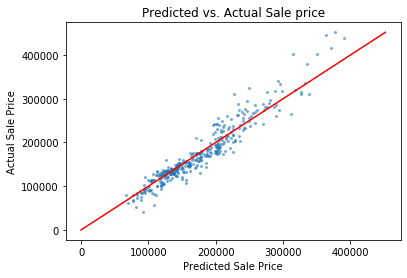

In [66]:
# Rerunning graphics with No_outliers model

# Predicted vs actual scatterplot
plt.scatter(ridge_pred_no_test, y_test_no_outliers, alpha=0.5, s=4)
plt.title('Predicted vs. Actual Sale price')
plt.xlabel('Predicted Sale Price')
plt.ylabel('Actual Sale Price')
plt.plot(list(range(y_test_no_outliers.max())),list(range(y_test_no_outliers.max())), c='r')
plt.show()

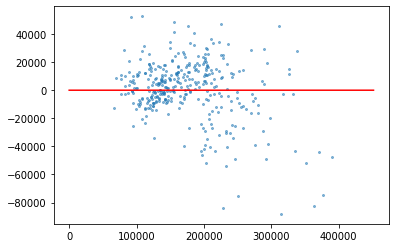

In [67]:
# Predicted vs residuals
residuals = ridge_pred_no_test-y_test_no_outliers
residuals_train = ridge_pred_no_train-y_train_no_outliers
plt.scatter(ridge_pred_no_test, residuals, alpha = 0.5, s=4)
plt.plot(list(range(y_test_no_outliers.max())),[0]*y_test_no_outliers.max(), c='r')
plt.show()

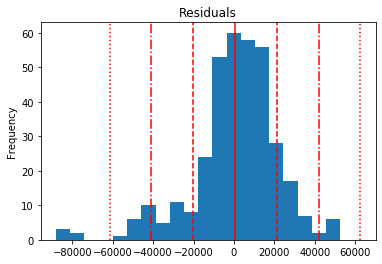

In [68]:

# Histogram of Residuals

mean_train = np.mean(residuals_train)
std_dev_train = np.std(residuals_train)

plt.hist(residuals, bins=20)
plt.axvline(mean, color='r')
plt.axvline(mean + std_dev_train, color='r', linestyle='--')
plt.axvline(mean + 2* std_dev_train, color='r', linestyle='-.')
plt.axvline(mean + 3* std_dev_train, color='r', linestyle=':')
plt.axvline(mean - std_dev_train, color='r', linestyle='--')
plt.axvline(mean - 2* std_dev_train, color='r', linestyle='-.')
plt.axvline(mean - 3* std_dev_train, color='r', linestyle=':')
plt.title('Residuals')
plt.ylabel('Frequency')
plt.show()